In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions 
from sklearn.model_selection import cross_val_score 

In [ ]:
colnames=['RI', 'NA2O', 'MGO', 'AL2O3','SIO2','K2O','CAO','BAO','FE2O3','TYPE'] 
data_x = pd.read_csv('trainKNN.txt', names=colnames, header=None)
data_x

,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


In [ ]:
colnames=['RI', 'NA2O', 'MGO', 'AL2O3','SIO2','K2O','CAO','BAO','FE2O3','TYPE'] 
data_y = pd.read_csv('testKNN.txt', names=colnames, header=None)
data_y

,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1
69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2
145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2
146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3
162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3
163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5


In [ ]:
df = pd.concat([data_y.assign(ind="data_y"), data_x.assign(ind="data_x")])
df

,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE,ind
68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1,data_y
69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1,data_y
70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1,data_y
144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2,data_y
145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2,data_y
...,...,...,...,...,...,...,...,...,...,...,...
207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.00,7,data_x
208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.00,7,data_x
209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7,data_x
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,data_x


In [ ]:
# cleaning

In [ ]:
df.isnull().sum()

RI       0
NA2O     0
MGO      0
AL2O3    0
SIO2     0
K2O      0
CAO      0
BAO      0
FE2O3    0
TYPE     0
ind      0
dtype: int64

In [ ]:
df.dtypes

RI       float64
NA2O     float64
MGO      float64
AL2O3    float64
SIO2     float64
K2O      float64
CAO      float64
BAO      float64
FE2O3    float64
TYPE       int64
ind       object
dtype: object

In [ ]:
df.drop_duplicates()

,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE,ind
68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1,data_y
69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1,data_y
70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1,data_y
144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2,data_y
145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2,data_y
...,...,...,...,...,...,...,...,...,...,...,...
207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.00,7,data_x
208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.00,7,data_x
209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7,data_x
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,data_x


In [ ]:
df.describe()

,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
iqr = df.K2O.quantile(0.75) - df.K2O.quantile(0.25)
upper_threshold = df.K2O.quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
lower_threshold = df.K2O.quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
upper_threshold, lower_threshold

(1.34125, -0.6087499999999999)

In [ ]:
df.K2O = df.K2O.clip(-0.6, 1.3)

In [ ]:
iqr = df.CAO.quantile(0.75) - df.CAO.quantile(0.25)
upper_threshold = df.CAO.quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
lower_threshold = df.CAO.quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
upper_threshold, lower_threshold

(10.57125, 6.841250000000001)

In [ ]:
df.CAO = df.CAO.clip(6.8, 10.5)

In [ ]:
# EDA

In [ ]:
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

,RI,TYPE
RI,1.000000,-0.164237
TYPE,-0.164237,1.000000


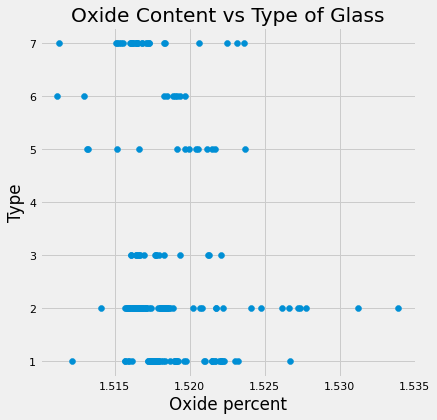

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 9])
plt.xlabel('Oxide percent')
plt.ylabel('Type')
plt.title('Oxide Content vs Type of Glass');

df[['RI','TYPE']].corr()

,NA2O,TYPE
NA2O,1.000000,0.502898
TYPE,0.502898,1.000000


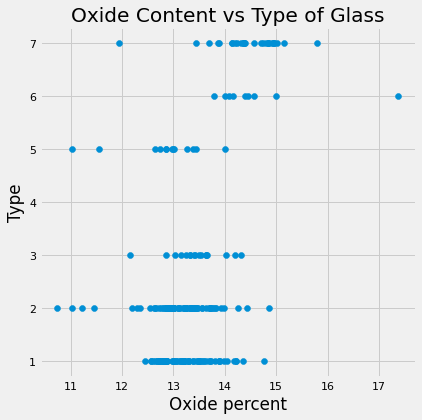

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 1], df.iloc[:, 9])
plt.xlabel('Oxide percent')
plt.ylabel('Type')
plt.title('Oxide Content vs Type of Glass');

df[['NA2O','TYPE']].corr()

,MGO,TYPE
MGO,1.000000,-0.744993
TYPE,-0.744993,1.000000


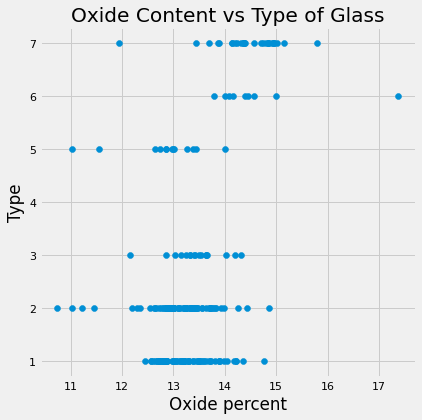

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 1], df.iloc[:, 9])
plt.xlabel('Oxide percent')
plt.ylabel('Type')
plt.title('Oxide Content vs Type of Glass');

df[['MGO','TYPE']].corr()

,AL2O3,TYPE
AL2O3,1.000000,0.598829
TYPE,0.598829,1.000000


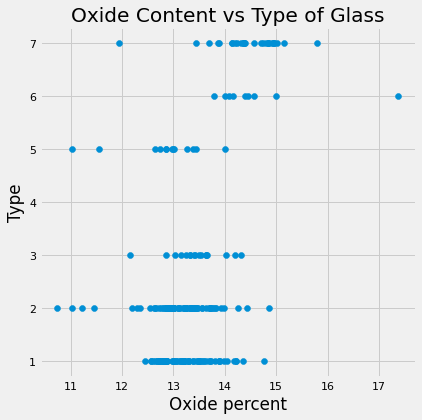

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 1], df.iloc[:, 9])
plt.xlabel('Oxide percent')
plt.ylabel('Type')
plt.title('Oxide Content vs Type of Glass');

df[['AL2O3','TYPE']].corr()

,SIO2,TYPE
SIO2,1.000000,0.151565
TYPE,0.151565,1.000000


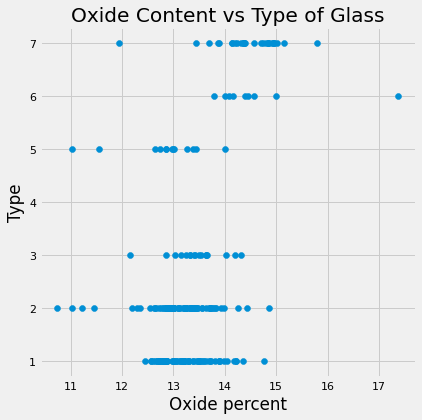

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 1], df.iloc[:, 9])
plt.xlabel('Oxide percent')
plt.ylabel('Type')
plt.title('Oxide Content vs Type of Glass');

df[['SIO2','TYPE']].corr()

,K2O,TYPE
K2O,1.000000,-0.254822
TYPE,-0.254822,1.000000


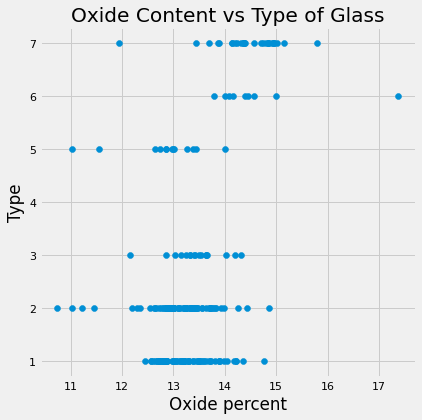

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 1], df.iloc[:, 9])
plt.xlabel('Oxide percent')
plt.ylabel('Type')
plt.title('Oxide Content vs Type of Glass');

df[['K2O','TYPE']].corr()

,CAO,TYPE
CAO,1.00000,0.04174
TYPE,0.04174,1.00000


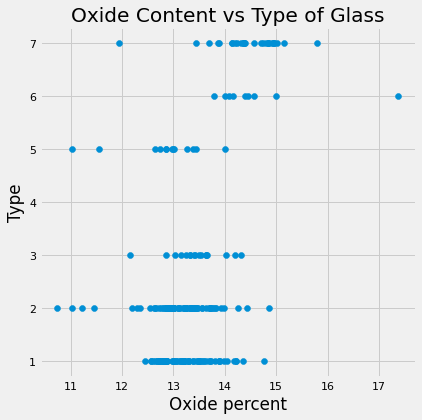

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 1], df.iloc[:, 9])
plt.xlabel('Oxide percent')
plt.ylabel('Type')
plt.title('Oxide Content vs Type of Glass');

df[['CAO','TYPE']].corr()

,BAO,TYPE
BAO,1.000000,0.575161
TYPE,0.575161,1.000000


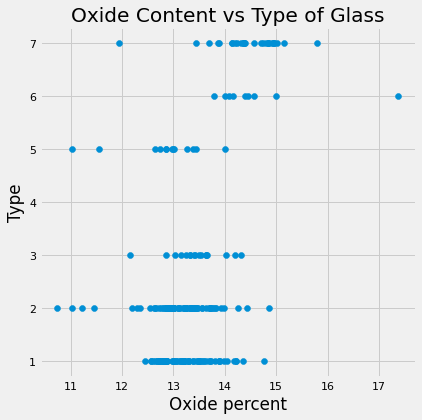

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 1], df.iloc[:, 9])
plt.xlabel('Oxide percent')
plt.ylabel('Type')
plt.title('Oxide Content vs Type of Glass');

df[['BAO','TYPE']].corr()

,FE2O3,TYPE
FE2O3,1.000000,-0.188278
TYPE,-0.188278,1.000000


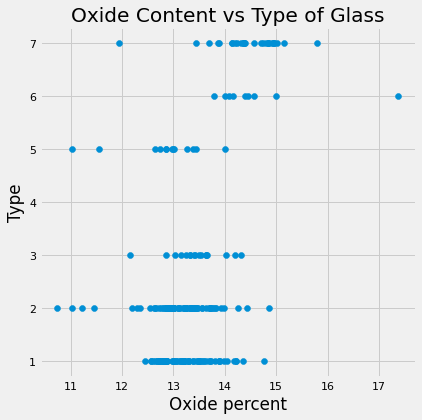

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 1], df.iloc[:, 9])
plt.xlabel('Oxide percent')
plt.ylabel('Type')
plt.title('Oxide Content vs Type of Glass');

df[['FE2O3','TYPE']].corr()

In [ ]:
df.head()

,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE,ind
68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1,data_y
69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1,data_y
70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1,data_y
144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2,data_y
145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2,data_y


In [ ]:
df.drop(['RI','SIO2','FE2O3','CAO','ind'], axis=1,inplace = True)

In [ ]:
df

,NA2O,MGO,AL2O3,K2O,BAO,TYPE
68,13.05,3.65,0.87,0.19,0.00,1
69,13.12,3.58,0.90,0.23,0.00,1
70,13.31,3.58,0.82,0.12,0.00,1
144,13.00,3.47,1.79,0.66,0.00,2
145,12.99,3.18,1.23,0.58,0.00,2
...,...,...,...,...,...,...
207,14.94,0.00,1.87,0.00,1.38,7
208,14.39,0.00,1.82,1.30,2.88,7
209,14.37,0.00,2.74,0.00,0.54,7
210,14.14,0.00,2.88,0.08,1.06,7


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(df)

from sklearn.cluster import KMeans
km = KMeans(n_clusters=2) 
km.fit(data) 

centroids = km.cluster_centers_ 
centroids

array([[-0.26937449,  0.40229748, -0.32676794,  0.13745408, -0.33235784,
        -0.45689785],
       [ 0.98380248, -1.46926037,  1.19341333, -0.50200621,  1.21382863,
         1.66867042]])

In [ ]:
km.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
km.inertia_

753.0873042486261

In [ ]:
df.head()

,NA2O,MGO,AL2O3,K2O,BAO,TYPE
68,13.05,3.65,0.87,0.19,0.0,1
69,13.12,3.58,0.90,0.23,0.0,1
70,13.31,3.58,0.82,0.12,0.0,1
144,13.00,3.47,1.79,0.66,0.0,2
145,12.99,3.18,1.23,0.58,0.0,2


Text(0.5, 1.0, 'Visualization of Glass Types')

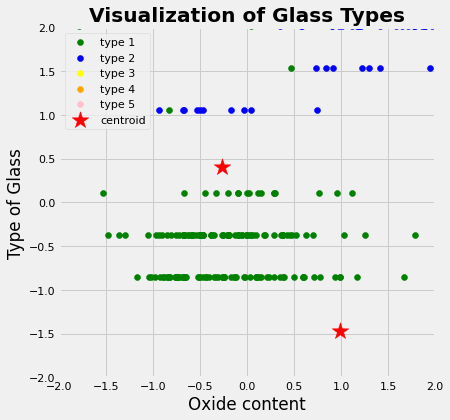

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(data[km.labels_ == 0,0], data[km.labels_ ==0,5],
            c='green', label='type 1')
plt.scatter(data[km.labels_ == 1,0], data[km.labels_ == 1,5],
            c='blue', label='type 2')
plt.scatter(data[km.labels_ == 2,0], data[km.labels_ == 2,5],
            c='yellow', label='type 3')
plt.scatter(data[km.labels_ == 3,0], data[km.labels_ == 3,5],
            c='orange', label='type 4')
plt.scatter(data[km.labels_ == 4,0], data[km.labels_ == 4,5],
            c='pink', label='type 5')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='red', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Oxide content')
plt.ylabel('Type of Glass')
plt.title('Visualization of Glass Types', fontweight='bold')

In [ ]:
# Determing the K

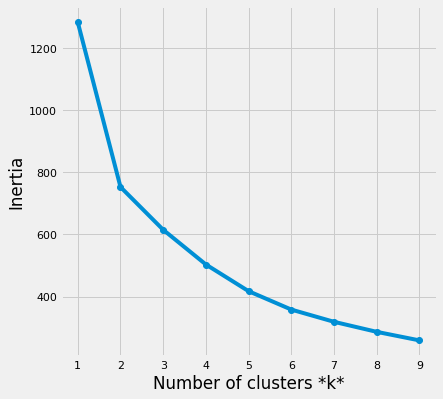

In [ ]:
inertias = []  # storer inertia for all values of k 
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(data)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia'); 

In [ ]:
# Manhattan distance

In [56]:
def manhattanDistance (x1, x2):
  dist = abs(x1-x2)
  dist = sum(dist)
  return(dist)
print("Manhattan distance is: ")
manhattanDistance(df['NA2O'], df['MGO'])

Manhattan distance is: 


85.1089204079241

In [ ]:
manhattanDistance(df['MGO'], df['AL2O3'])

95.60779579404557

In [ ]:
manhattanDistance(df['AL2O3'], df['K2O'])

38.876347951114305

In [ ]:
manhattanDistance(df['BAO'], df['TYPE'])

53.9031746031746

In [ ]:
# euclidean distance

In [59]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [60]:
euclidean_distance(df['NA2O'],df['MGO'])  index=['NA2O', 'MGO', 'AL2O3', 'K2O', 'BAO', 'TYPE'])

6.160228104493618

In [61]:
euclidean_distance(df['MGO'],df['AL2O3'])

7.0372285124721214

In [62]:
euclidean_distance(df['AL2O3'],df['K2O'])

3.7137615618396214

In [63]:
euclidean_distance(df['BAO'],df['K2O'])

5.939032089874273

In [64]:
euclidean_distance(df['BAO'],df['TYPE'])

5.511596835079792